In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from xai import read_occ_data, create_dataframe, plot_true_fake_maps
from xai import plot_occ_maps

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
base_output_dir = "../output/" # Meanwhile I have my own output directory with GAN results
names = ['test', 'xai_exp_occlusion' ]
results_dir = "../output/xai_occlusion_results/"
nrun = 100
nindex = 1
suffix_list = [ "run{:d}_index{:d}".format(i, j) for i in range(nrun) for j in range(nindex) ]
ref_dir = os.path.join(base_output_dir, names[0])
occ_dir = os.path.join(base_output_dir, names[1])
suffix=f"run1_index0" #what is wrong with run60_index0?

In [3]:
def read_occ_data_v2(output_dir, n_occ, suffix=f"run0_index0"):
    """
    Read the original inputs, but also the perturbed inputs as 
    perturbed during testing and the generated images. 
    Returns a pandas dataframe for a single sample.
    """
    
    f_realA = f"/mnt/data_cat4/moriwaki/IM2IM/val_data/{suffix}_z1.3_ha.fits"
    f_realB = f"/mnt/data_cat4/moriwaki/IM2IM//val_data/{suffix}_z2.0_oiii.fits"
    f_fakeA = f"{output_dir}/gen_{suffix}_occluded{n_occ}_0.fits"
    print(f_fakeA)
    f_fakeB = f"{output_dir}/gen_{suffix}_occluded{n_occ}_1.fits"
    f_pertA = f"{output_dir}/occluded_input_{suffix}_occluded{n_occ}_target_0.fits"
    f_pertB = f"{output_dir}/occluded_input_{suffix}_occluded{n_occ}_target_1.fits"
    f_pertC = f"{output_dir}/occluded_input_{suffix}_occluded{n_occ}_source.fits"
    
    # Construct lists for opening the files
    f_real = [ f_realA, f_realB ]
    f_fake = [ f_fakeA, f_fakeB ]
    f_pert = [ f_pertC, f_pertA, f_pertB ]
    # Open the files and construct a data list and corresponding keys
    raw_r  = [ fits.open( f )[0].data for f in f_real ]
    data_r = [ raw_r[0]+raw_r[1], raw_r[0], raw_r[1] ]
    keys_r = ['obs', 'realA', 'realB']
    raw_f  = [ fits.open( f )[0].data for f in f_fake ]
    data_f = [ raw_f[0]+raw_f[1], raw_f[0], raw_f[1] ]
    keys_f = ['rec', 'fakeA', 'fakeB']
    data_p = [ fits.open( f )[0].data for f in f_pert ]
    keys_p = ['p_s', 'p_tA', 'p_tB'] # p_s: perturbed source, p_t: perturbed target
    # Create dictionaries with keys and data
    dict_r = dict(zip(keys_r, data_r))
    dict_f = dict(zip(keys_f, data_f))
    dict_p = dict(zip(keys_p, data_p))
    # Convert to pandas dataframes
    df_r = pd.DataFrame.from_dict({k: [v] for k, v in dict_r.items()})
    df_f = pd.DataFrame.from_dict({k: [v] for k, v in dict_f.items()})
    df_p = pd.DataFrame.from_dict({k: [v] for k, v in dict_p.items()})
    # Concatenate all into one dataframe
    df = pd.concat([df_r, df_p, df_f], axis=1)
    
    return df

def plot_shuffled_map_v2(df, results_dir, n_occ, exp_name='occ', suffix=f"run0_index0"):
    #vmin = -2.0e-07
    #vmax = 2.0e-07
    vmin = 0
    vmax = 9.0e-08  
    
    _, axs = plt.subplots(3,3, figsize=(10, 8))
    
    col = df.columns
    for i in range(len(col)):
        ax = axs[int(i/3)][int(i%3)]
        ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
        ax.set_title(col[i])
        ax.imshow(df[col[i]].values[0], interpolation="none", vmin=vmin, vmax=vmax)
        
    filename =f"{exp_name}_{suffix}_occluded{n_occ}_image.png"    
    save_path = os.path.join(results_dir, filename)    
    plt.savefig(save_path) 
    plt.show()
    plt.close()

../output/xai_exp_occlusion/gen_run1_index0_occluded0_0.fits


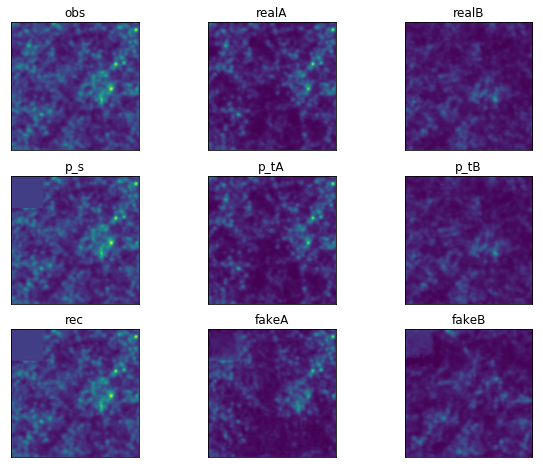

../output/xai_exp_occlusion/gen_run1_index0_occluded1_0.fits


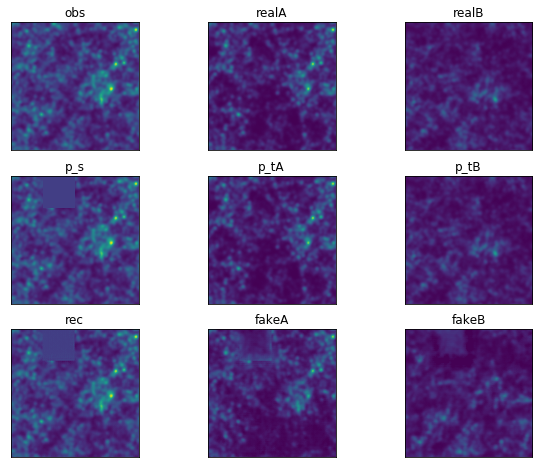

../output/xai_exp_occlusion/gen_run1_index0_occluded2_0.fits


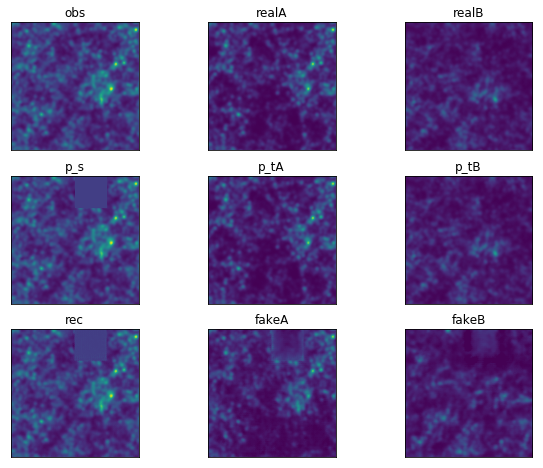

../output/xai_exp_occlusion/gen_run1_index0_occluded3_0.fits


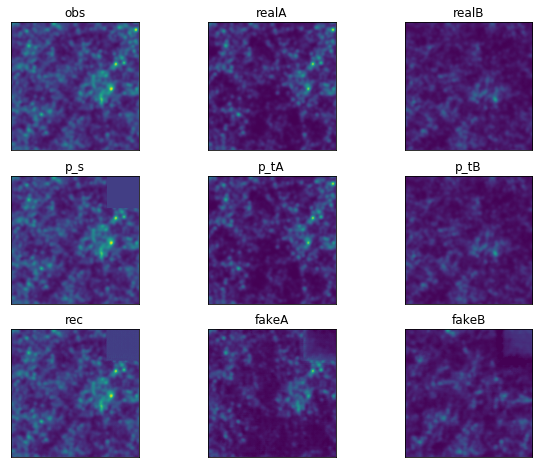

../output/xai_exp_occlusion/gen_run1_index0_occluded4_0.fits


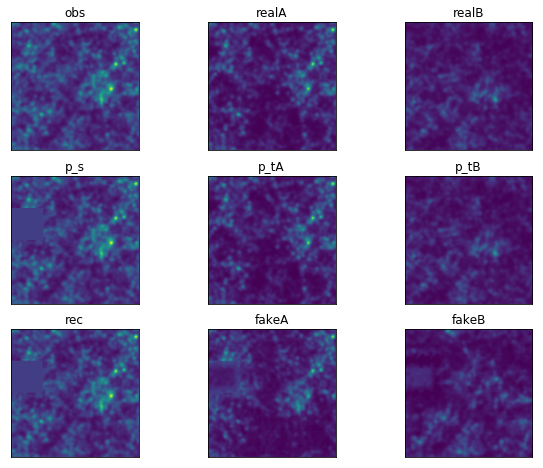

../output/xai_exp_occlusion/gen_run1_index0_occluded5_0.fits


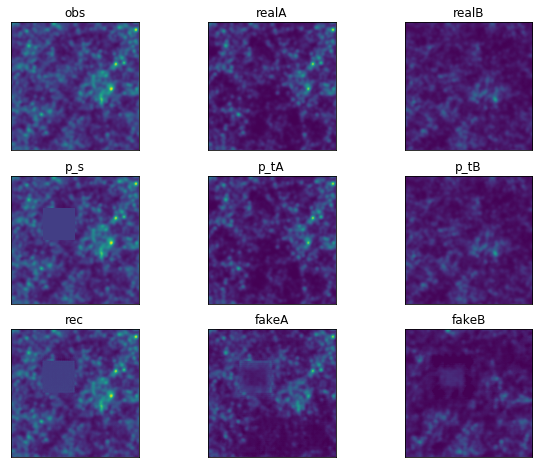

../output/xai_exp_occlusion/gen_run1_index0_occluded6_0.fits


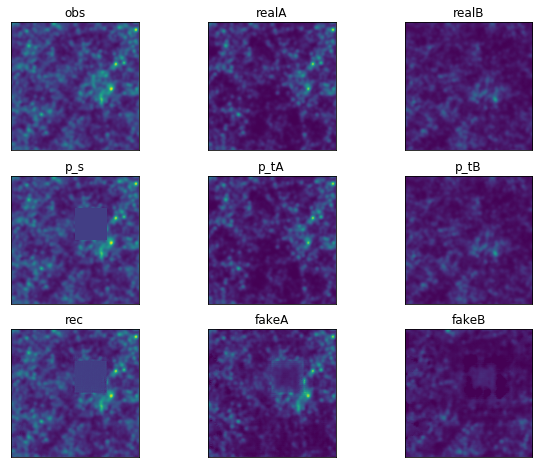

../output/xai_exp_occlusion/gen_run1_index0_occluded7_0.fits


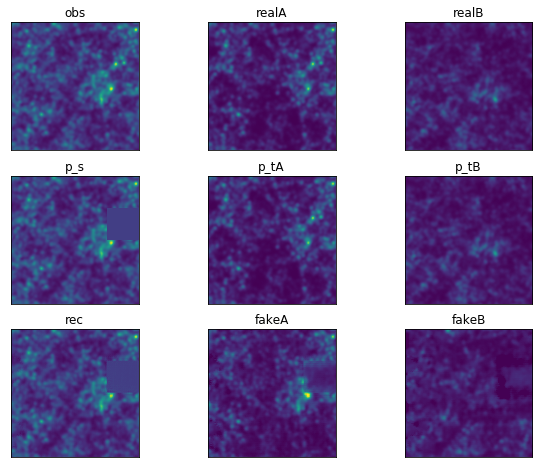

../output/xai_exp_occlusion/gen_run1_index0_occluded8_0.fits


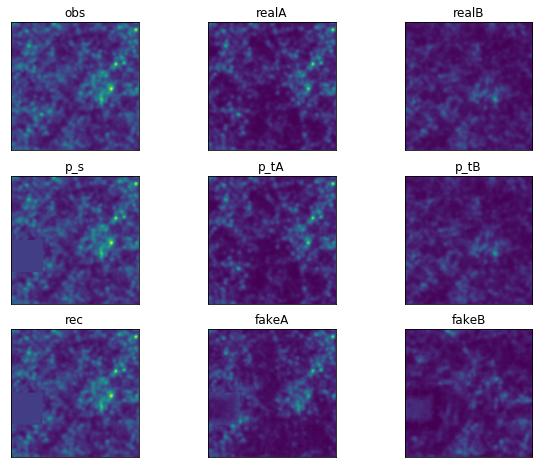

../output/xai_exp_occlusion/gen_run1_index0_occluded9_0.fits


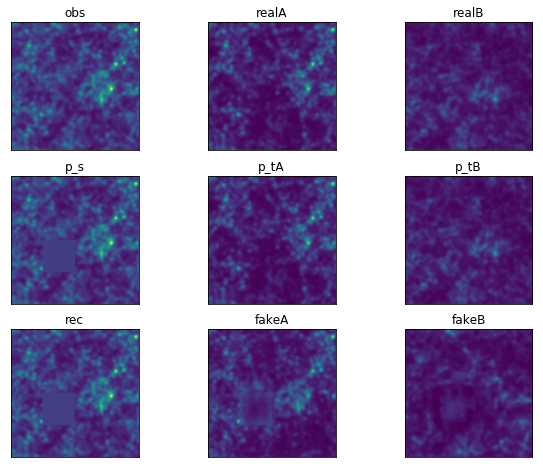

../output/xai_exp_occlusion/gen_run1_index0_occluded10_0.fits


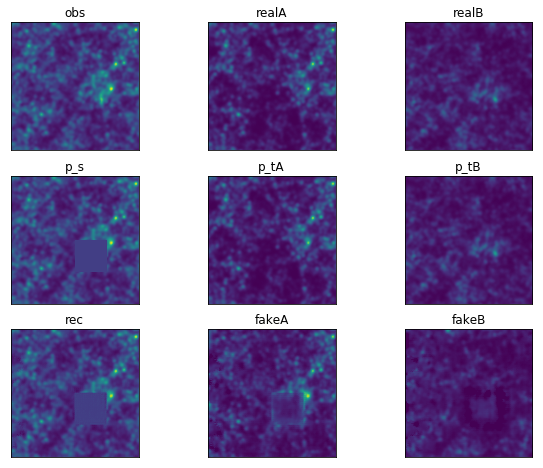

../output/xai_exp_occlusion/gen_run1_index0_occluded11_0.fits


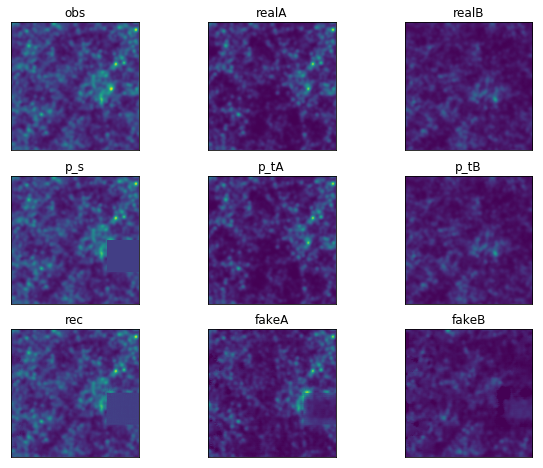

../output/xai_exp_occlusion/gen_run1_index0_occluded12_0.fits


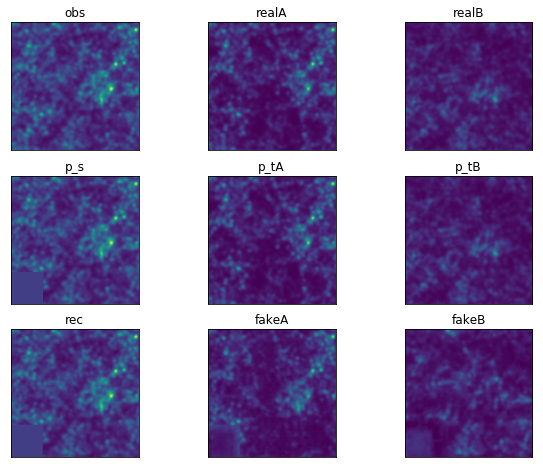

../output/xai_exp_occlusion/gen_run1_index0_occluded13_0.fits


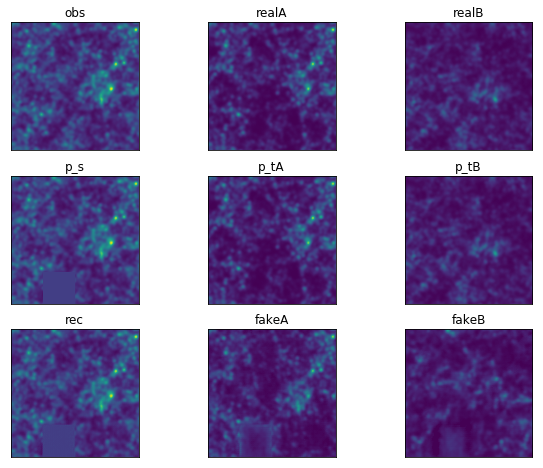

../output/xai_exp_occlusion/gen_run1_index0_occluded14_0.fits


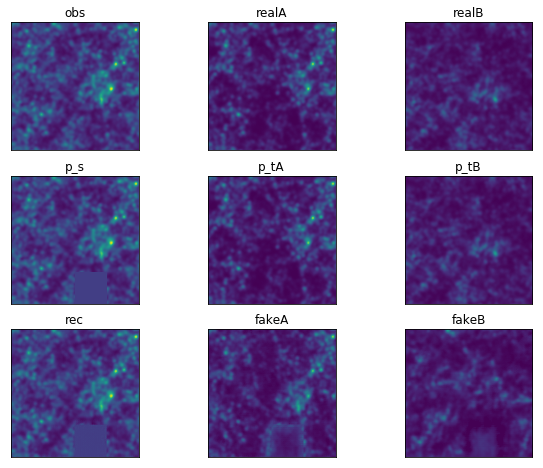

../output/xai_exp_occlusion/gen_run1_index0_occluded15_0.fits


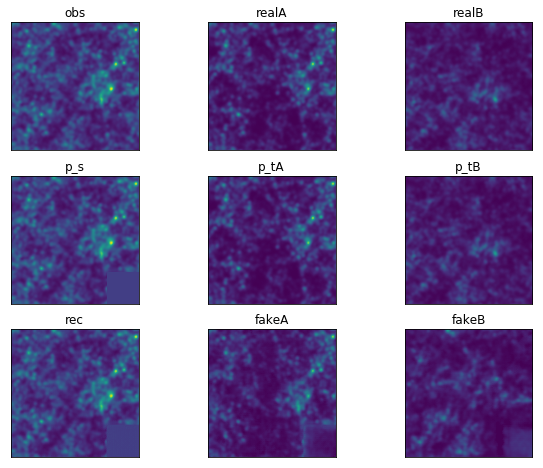

In [4]:
for i in range(16):
    df = read_occ_data_v2(occ_dir, i, suffix=suffix)
    plot_shuffled_map_v2(df, results_dir, i, exp_name='occ', suffix=suffix)